In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

In [2]:
K=10
## structure de données:
# pkd: dimensions (K, D) matrice de la proba p(k,d) que le pixel d soit allumé pour les images de classe k
# Pk : dimension  (K)    matrice des probas de classe: P(y_true == k) est la proba qu'une image prise au hasard soit de classe k.


## Version de MNIST (très) réduite

In [3]:
######### les données ################
import sklearn.datasets
X,y = sklearn.datasets.load_digits(n_class=K, return_X_y=True)
# np.savez_compressed("ManualLoad.npz", X=X, y=y)
print(X.shape)
Dlin=8

(1797, 64)


## Version de MNIST plus grande : 

In [4]:

#### wget https://gitlab.inria.fr/flandes/data-for-teaching/-/blob/master/mnist70.npz

data = np.load('/home/flandes/data/mnist70.npz', 'X', 'y')
X = data['X']
y = data['y']
print(X.shape)
Dlin=28

(70000, 784)


Text(0.5, 1.0, 'ceci est censé ressembler à un 8 avant la binarisation')

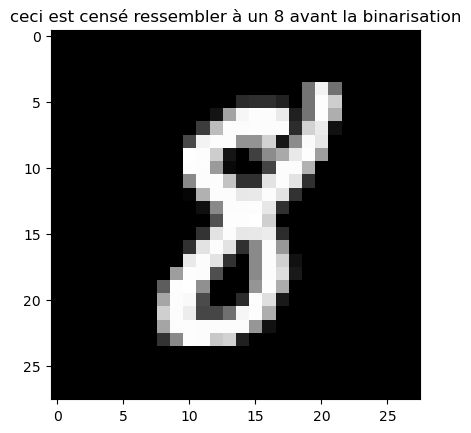

In [5]:
######################################
## petite demo d'affichage ##
plt.figure()
n=41 # image numero 42
plt.imshow(X[n].reshape(Dlin,Dlin) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y[n])+ " avant la binarisation")
# plt.show() ## inutile si on a mis plt.in() au début #
#############################

In [6]:
##################################################
#### preparation des donnees (pre processing) ####

# on met X (les intensités de niveaux de gris) entre 0 et 1
X /= X.max()

## on binarise X, de sorte que il vaut soit 0 soit 1,
## comme les valeurs prises par une loi de Bernoulli
## TODO

thr = 0.5 

X [X>=thr] = 1 
X [X<thr] = 0

## dans le cas Gaussien, il n'est pas nécéssaire de binariser.


In [7]:
## separation train/test (ici, il n'y a pas d'hyperparametres, pratiquement, donc on ne fait pas de validation)
## quoique... il y en a au moins un, lequel ?
## TODO:
Ntot   =  X.shape[0]    #Ntotal
Ntrain =  int(Ntot*0.8)
# Ntest  =  int(Ntot*0.4)

X_train = X[0: Ntrain]
X_test  = X[Ntrain:Ntot] # X[-Ntest:] est equivalent
y_train = y[0:Ntrain]
y_test  = y[Ntrain:Ntot]

print("X.shape", X.shape)
print("X_traim.shape", X_train.shape)
print("X_test.shape", X_test.shape)

X.shape (70000, 784)
X_traim.shape (56000, 784)
X_test.shape (14000, 784)


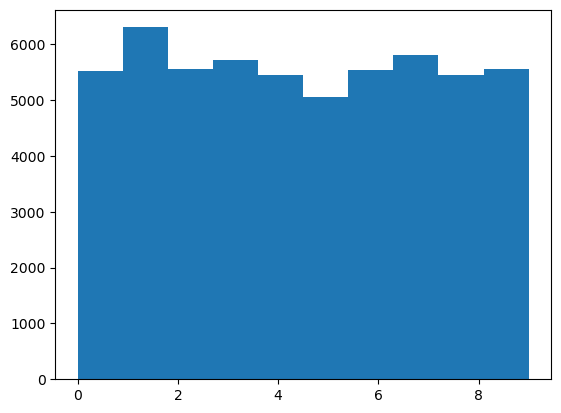

In [8]:
## On peut vérifier que toutes les classes sont bien présentes:
_ = plt.hist(y_train, bins=10)

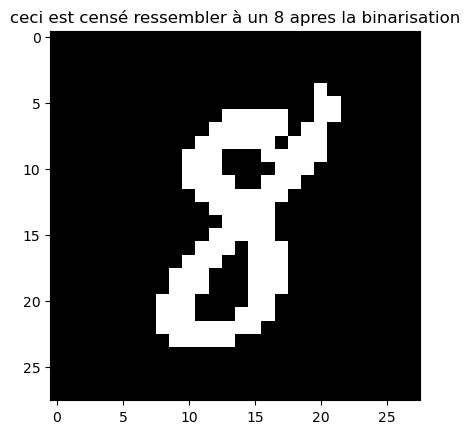

In [9]:
#############################
## petite demo d'affichage ##
plt.figure()
n=41 # image numero 42
plt.imshow(X_train[n].reshape(Dlin, Dlin) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y_train[n])+" apres la binarisation")
plt.show()
#############################

In [10]:
## l'algo d'apprentissage ##
def BayesienNaif_fit(X_train,y_train):
    N = X.shape[0]
    D = X.shape[1]
    K = (y_train.max()-y_train.min()+ 1)
    ## TODO
    ## devrait retourner les parametres du modele (appris)
    pkd = np.zeros((K,D))
    Pk = np.zeros(K)
    for k in range(K): 
        pkd[k] = np.mean(X_train[y_train==k], axis=0)
        Pk[k]  = np.mean(y_train==k)
    return pkd, Pk


In [11]:
## TODO: entrainer,
pkd, Pk = BayesienNaif_fit(X_train,y_train)

In [12]:
## la fonction de dećision (a parametres fixés) ##
def BayesienNaif_predict(X,pkd, Pk):
    ## TODO
    EPS=1e-8
    K = 10
    D = X.shape[0]
    vecteur_de_probas = np.zeros((K, X.shape[0]))
    for k in range(K):
        ## le plus gros du boulot est fait ici:
        vecteur_de_probas[k] = (X@np.log(pkd[k]+EPS) +
                             + (1-X[:,:])@np.log(1-pkd[k,:]+EPS)\
                               ) \
        +np.log(Pk[k])
    ketoile = np.argmax(vecteur_de_probas, axis=0)
    return ketoile # devrait retourner les labels des images

In [13]:
## TODO: tester

y_hat_test = BayesienNaif_predict(X_test,pkd,Pk)

In [14]:
y_test, y_hat_test

(array([1, 8, 5, ..., 4, 5, 6]), array([1, 5, 5, ..., 9, 8, 6]))

In [15]:
y_hat_train = BayesienNaif_predict(X_train,pkd,Pk)

## Affichage des scores (et matrice de confusion)

matrice de confusion: TODO - INDICE: lire la doc de sklearn.metrics / puis le faire a la main/plus tard(quand vous aurez sklearn)


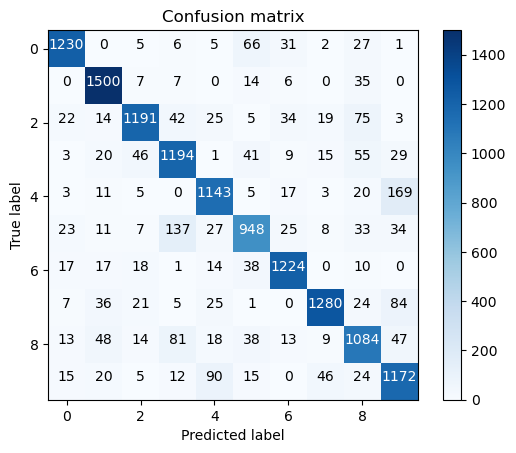

accuracy score: TODO -INDICE:  lire la doc de sklearn.metrics / puis le faire a la main (c'est facile)
0.8547142857142858


In [16]:
print("matrice de confusion: TODO - INDICE: lire la doc de sklearn.metrics / puis le faire a la main/plus tard(quand vous aurez sklearn)")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools


cm = confusion_matrix(y_test,y_hat_test)


plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



print("accuracy score: TODO -INDICE:  lire la doc de sklearn.metrics / puis le faire a la main (c'est facile)")

acc = accuracy_score(y_test, y_hat_test)
print(acc)

In [17]:
sklearn.metrics.balanced_accuracy_score(y_test, y_hat_test)

0.8526112758521988

In [18]:
##train accuracy just to check 
## (to compare and estimate amount of see overfitting)

accuracy_score(y_train,y_hat_train),\
sklearn.metrics.balanced_accuracy_score(y_train,y_hat_train)

(0.8348571428571429, 0.8321977415502937)

## Affichage des parametres:

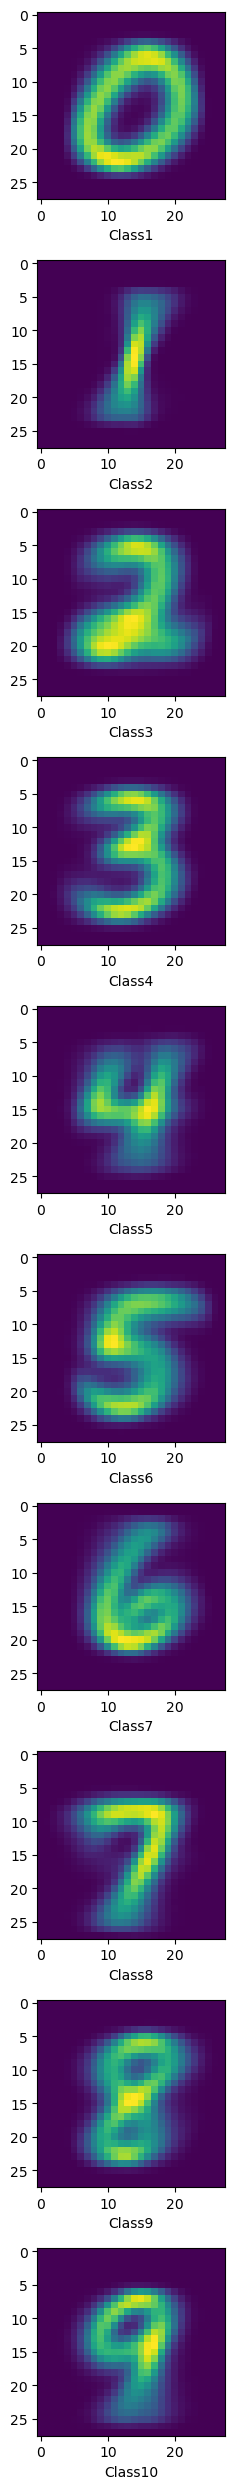

In [19]:
###############################
## affichage des parametres: ##

## TODO: afficher les parametres appris sous un format lisible par l'humain
fig, axs = plt.subplots(10,1, figsize=(25,25))

# Plot a histogram for each variable
for i in range(pkd.shape[0]):
    axs[i].imshow(pkd[i, :].reshape(Dlin,Dlin))
    axs[i].set_xlabel('Class{}'.format(i+1))
    #axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
###############################

In [20]:
## Bonus: refaire l'entrainement avec pour modèle une matrice de Covariance pleine et non diagonale.
## conseil: faire d'abord une PCA, car sinon le nombre de paramètres explose !!

# Bonus: on a un modèle génératif !!

In [21]:
np.random.randint(0,2,(10))

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

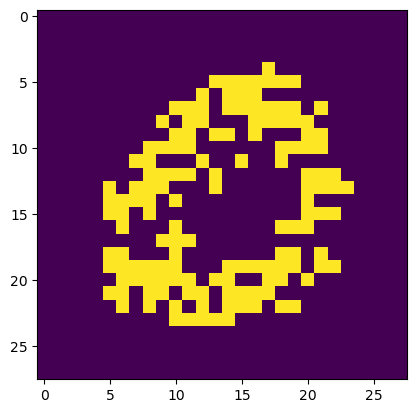

In [22]:
## la feuille de brouillon:
k=0
imageGeneree = np.random.random((Dlin*Dlin)) < pkd[k]
plt.imshow(imageGeneree.reshape(Dlin,Dlin))

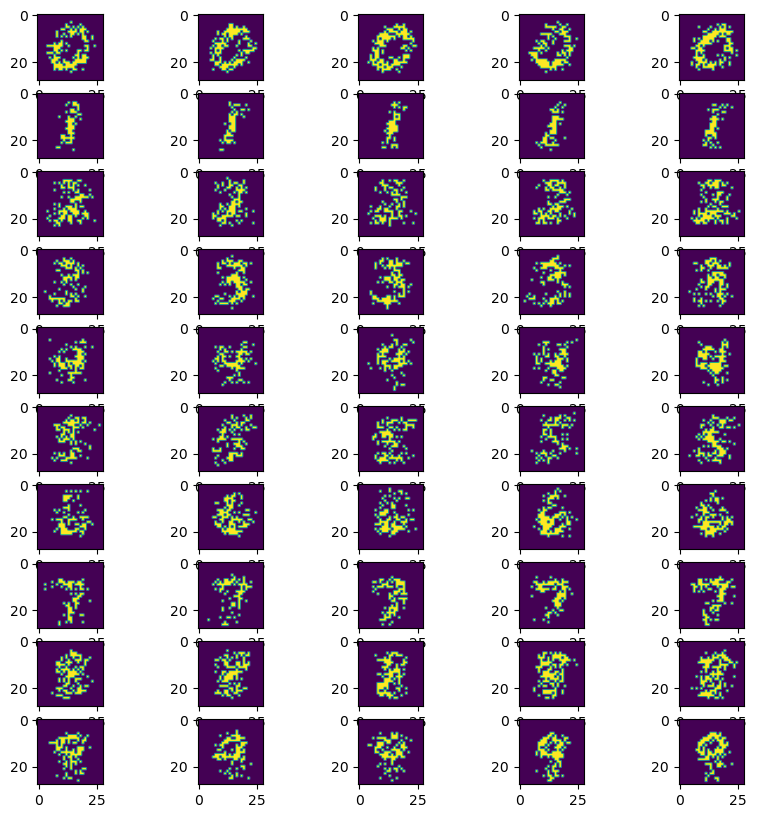

In [23]:
NmbreImageParClasse = 5
fig, axs = plt.subplots(K, NmbreImageParClasse, figsize=(10, 10))

for k in range(K):
    for iteration in range(NmbreImageParClasse):
        imageGeneree = np.random.random((Dlin*Dlin)) < pkd[k]
        axs[k, iteration].imshow(imageGeneree.reshape(Dlin,Dlin))
# plt.tight_layout()
plt.show()

## Conclusion: on voit bien le problème de l'hypothèse "pixels indépendants"

C'est pas très joli, car chaque pixel est indépendant des voisins..Mais on arrive quand meme bien a reconnaitre un certain nombre de cas.TODO: ajouter la correction avec PCA + modele gaussien non naif (et aussi en generation) - vous pouvez essyaer et me l'envoyer, aussi !